In [1]:
from __future__ import division, print_function

# For reloading external modules
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
import numpy as np
import os

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 640
ny = 360

In [4]:
generator = image_util.ImageDataProvider(
    images_path='./unit-tests')


Number of files used: 7


In [5]:
net = unet.Unet(channels=3, n_class=3, layers=4, features_root=16, cost_kwargs=dict(class_weights=[1,1,1]))

2017-10-09 17:47:48,678 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [6]:
x_test, y_test, names = generator(7)

prediction = net.predict("./unet_trained/v8_b4_ly4_(removed bad training)/model.cpkt", x_test)




INFO:tensorflow:Restoring parameters from ./unet_trained/v8_b4_ly4_(removed bad training)/model.cpkt


2017-10-09 17:47:58,907 Restoring parameters from ./unet_trained/v8_b4_ly4_(removed bad training)/model.cpkt
2017-10-09 17:47:59,311 Model restored from file: ./unet_trained/v8_b4_ly4_(removed bad training)/model.cpkt


ResourceExhaustedError: OOM when allocating tensor with shape[7,358,638,16]
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Reshape, Variable/read)]]
	 [[Node: div_1/_77 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_803_div_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Conv2D', defined at:
  File "c:\opt\python35\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\opt\python35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\opt\python35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\opt\python35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\opt\python35\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "c:\opt\python35\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "c:\opt\python35\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\opt\python35\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\opt\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "c:\opt\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\opt\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "c:\opt\python35\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\opt\python35\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\opt\python35\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\opt\python35\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\opt\python35\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\opt\python35\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\opt\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\opt\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\opt\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-1d03fc16d42b>", line 1, in <module>
    net = unet.Unet(channels=3, n_class=3, layers=4, features_root=16, cost_kwargs=dict(class_weights=[1,1,1]))
  File "C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\unet.py", line 195, in __init__
    logits, self.variables, self.offset = create_conv_net(self.x, self.keep_prob, channels, n_class, **kwargs)
  File "C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\unet.py", line 93, in create_conv_net
    conv1 = conv2d(in_node, w1, keep_prob)
  File "C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\layers.py", line 36, in conv2d
    conv_2d = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID')
  File "c:\opt\python35\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 399, in conv2d
    data_format=data_format, name=name)
  File "c:\opt\python35\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "c:\opt\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "c:\opt\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[7,358,638,16]
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Reshape, Variable/read)]]
	 [[Node: div_1/_77 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_803_div_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


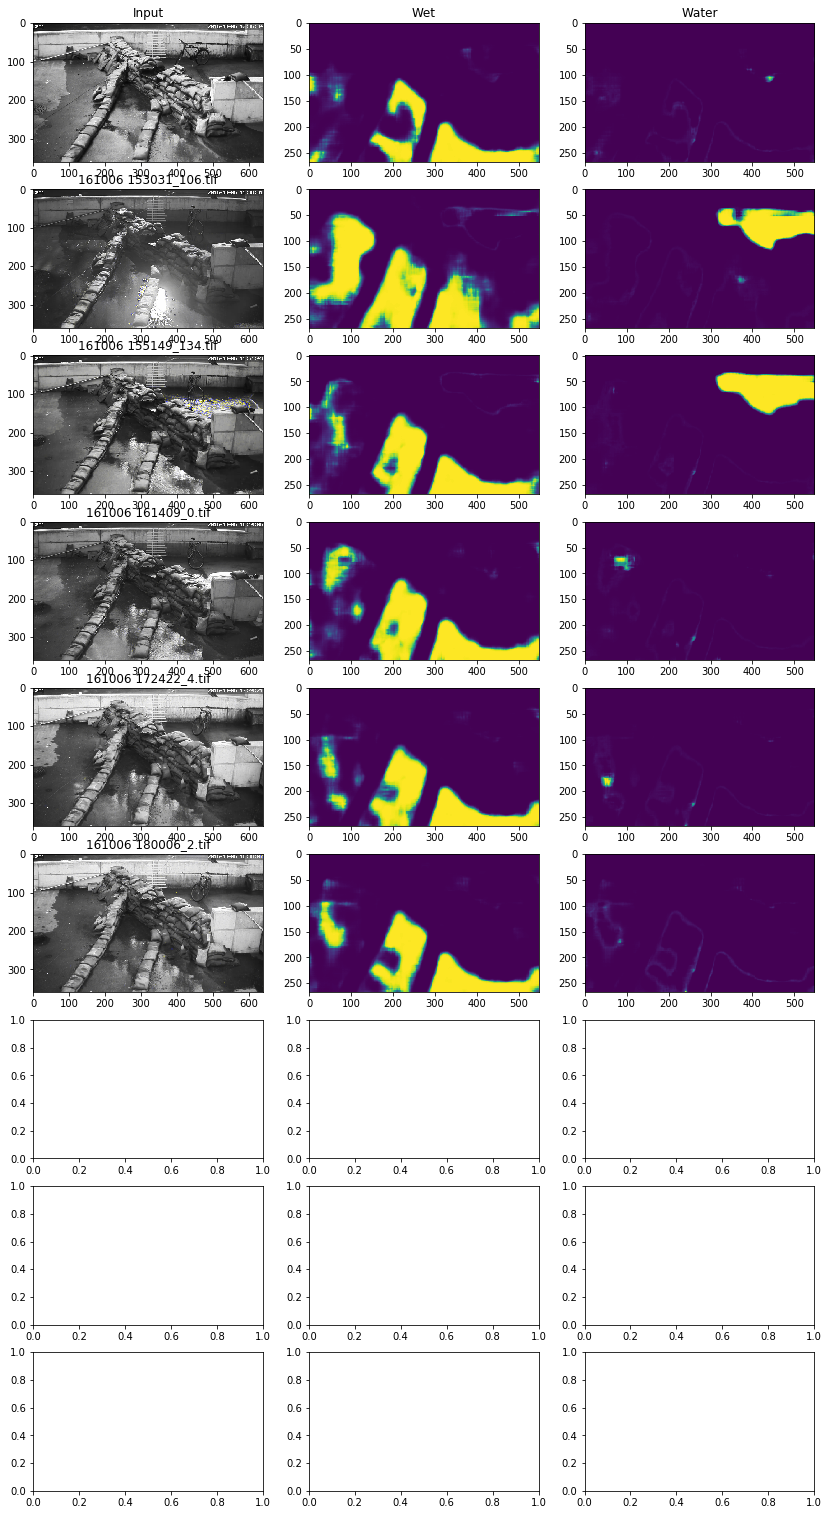

In [7]:
fig, ax = plt.subplots(9, 3, sharex=False, sharey=False, figsize=(14,27))
for i in range(0,6):
    ax[i,0].set_title(os.path.basename(names[i]))
    ax[i, 0].imshow(x_test[i,...], aspect="auto")
    mask = prediction[i,...,1]#>0.8
    ax[i, 2].imshow(mask, aspect="auto")
    
#     ax[i, 3].imshow(y_test[i,...,2], aspect="auto")
    mask = prediction[i,...,2]#>0.8
    ax[i, 1].imshow(mask, aspect="auto")
ax[0,0].set_title("Input")
ax[0,1].set_title("Wet")
ax[0,2].set_title("Water")